# Part I - Ford GoBike System Data
## by Tersoo Adorowa

## Introduction
> This document explores a dataset containing users and trips data for the Ford GoBike system



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import time

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
gobikes = pd.read_csv('./fordgobike.csv')

In [3]:
gobikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
print(gobikes.shape)
print(gobikes.dtypes)
print(gobikes.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [5]:
# I need to create a new column containing members age
gobikes['member_age'] = 2022-gobikes['member_birth_year']

In [6]:
#I will now group ages in clusters:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
gobikes['grouped_age']= pd.cut(gobikes['member_age'], bins, labels = labels,include_lowest = True)

In [7]:
#Transform objects in datetime and checks:
gobikes['start_time'] = pd.to_datetime(gobikes.start_time)
gobikes['end_time'] = pd.to_datetime(gobikes.end_time)

In [8]:
gobikes.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,grouped_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0,30-39
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0,40-49


In [9]:
gobikes.shape

(183412, 18)

In [10]:
# descriptive statistics for numeric variables 
print(gobikes.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [11]:
print(gobikes.dtypes)

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
member_age                        float64
grouped_age                      category
dtype: object


### What is the structure of your dataset?

> After wranging the data, there are 183412 bike trips with 18 features:

   > Time of trip: duration_sec, start_time,end_time;
   
   > Ids: bike_id, start_station_id, end_station_id;
    
   > stations: start_station_name, end_station_name;
   
   > User: user_type, member_gender, member_age, grouped_age;
   
   > Other: bike_share_for_all_trip.
   
   > User_type, member_gender, and age_grouped are categorical nominals, and the oder variables are numericals.

### What is/are the main feature(s) of interest in your dataset?

> my interest is basicallly figuring out the customers profiles.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that age and gender can affect usertype and duration of trips.

## Univariate Exploration

### Examining frequencies

#### I will begin by looking at these variables: member_gender, member_age and user_type.

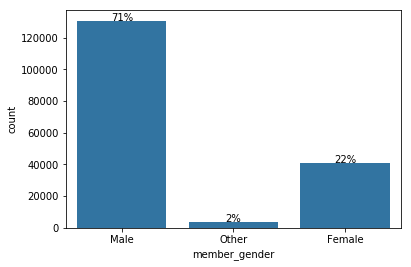

In [12]:
#I will start by creating a plot
base_color = sb.color_palette()[0]
sb.countplot(data = gobikes, x = 'member_gender', color = base_color)

# now add annotations
n_points = gobikes.shape[0]
cat_counts = gobikes['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

There are more men than women by landslide margin. There is also the 'other' which can be overlooked.

#### Ploting bargraphs for number of trips by members age and by age grouped.

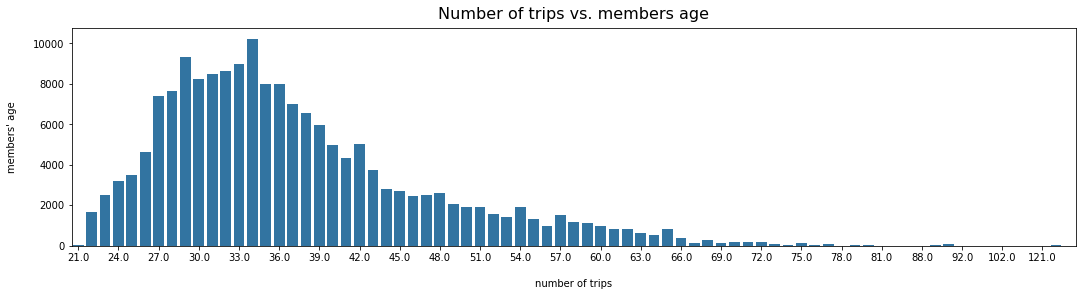

In [13]:
gobikes["member_age_new"] = np.where(gobikes["member_age"] >= 100, 100,  gobikes["member_age"] )

# create the plot 
plt.figure(figsize = [18,4])
base_color = sb.color_palette()[0]
sb.countplot(data = gobikes, x = 'member_age', color = base_color)


# add annotations
#n_points = bikes.shape[0]
#cat_counts = bikes['member_age'].value_counts()
#locs, labels = plt.xticks() # get the current tick locations and labels

# ensure that the labels are created:
plt.draw()
# get x tick labels and position
loc, label = plt.xticks()
# set the xticks for every second (original) xtick
plt.xticks(loc[::3],label[::3])   

plt.title('Number of trips vs. members age', fontsize=16, y=1.015)
plt.ylabel("members' age", labelpad=16)
plt.xlabel('number of trips', labelpad=16)


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points) 

The histogram is skewed right, which shows the mean is greater than the median.
The majority of frequences in trips are found between members of 22 and 39 years old.

#### Number of trips vs members' age

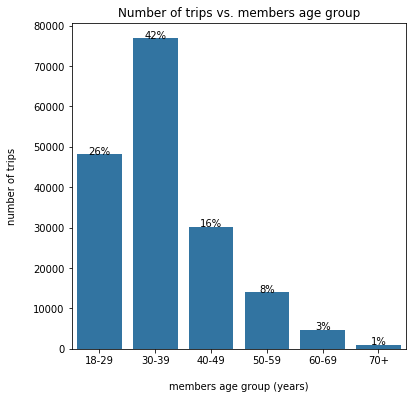

In [14]:
plt.figure(figsize=(6,6))
sb.countplot(data = gobikes, x = 'grouped_age', color = base_color)

plt.title('Number of trips vs. members age group')
plt.xlabel('members age group (years)', labelpad=16)
plt.ylabel('number of trips', labelpad=16)

# add annotations
n_points = gobikes.shape[0]
cat_counts = gobikes['grouped_age'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

for loc, label in zip(locs, labels):
    #get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]    
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black')

The bargraph of members age grouped per number of trips highlights the mority of trips per users between 30 and 39 years old.

#### Ploting a bargraph for number of trips by user type.

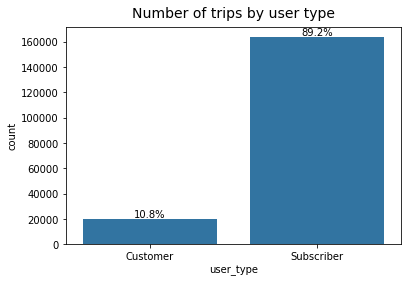

In [15]:
# create the plot 
plt.figure(figsize=(6,4))
base_color = sb.color_palette()[0]
sb.countplot(data = gobikes, x = 'user_type', color = base_color)

# add annotations
plt.title('Number of trips by user type', fontsize=14, y=1.015)
n_points = gobikes.shape[0]
cat_counts = gobikes['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]    
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar    
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'black',va='bottom')

Subscribers have the highest number of participation by a land slide. The customer participation is a little above 10%

### Outliers

Text(0.5,1.015,'Duration of trips')

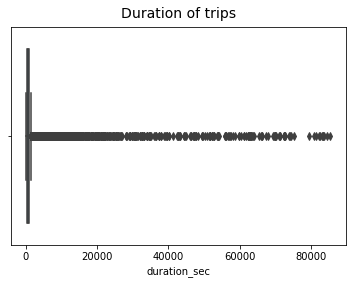

In [16]:
sb.boxplot(x=gobikes['duration_sec'])
plt.title('Duration of trips', fontsize=14, y=1.015)

Text(0.5,1.015,'Member_age')

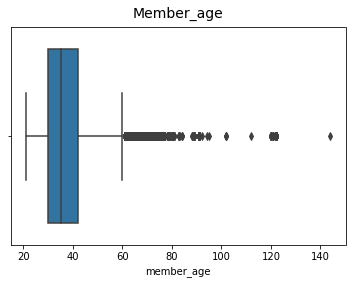

In [17]:
gobikes['member_age'] = gobikes.member_age.astype(float)
sb.boxplot(x=gobikes['member_age'])
plt.title('Member_age', fontsize=14, y=1.015)

Member age equal to or greater than 60 years are outliers.

Text(0.5,1.015,'Member age vs. member gender')

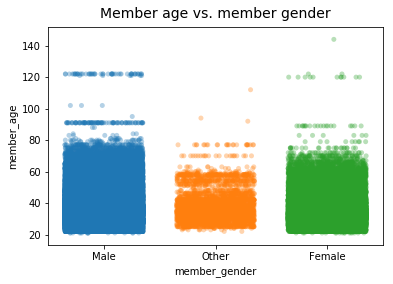

In [17]:
# create a numeric variable from the string 'member_age' 
# variable
gobikes['member_age'] = gobikes.member_age.astype(float)
# scatterplot (jittered) - age and gender
sb.stripplot(data = gobikes, x = 'member_gender', y = 'member_age',
           jitter = 0.35 , alpha =  1/3);
plt.title('Member age vs. member gender', fontsize=14, y=1.015)

Comparing the two variables apparently with more outliers using a scatter graph, people identified as Male and Others have more errors than Female.
Interestingly, it seems that only women are careful when entering the birth age and do not make gross mistakes. The gender men and others are said to be older than not just the outlier (60 years old) 
but also older than the life expectancy in the USA (78 years old).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I noticed that the female gender has no outliers in informing the date of birth, hence the age.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In a previous stage of data wrangling, I created a column containing members age and grouped them in aother column to help me plot some insightful visualiztion.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

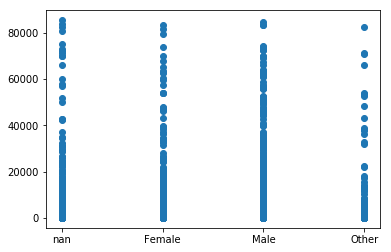

In [19]:
plt.scatter(data = gobikes, x = 'member_gender',y = 'duration_sec')

In [18]:
gobikes.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
member_age                        float64
grouped_age                      category
member_age_new                    float64
dtype: object

Text(0.5,1,'Member gender vs. member age')

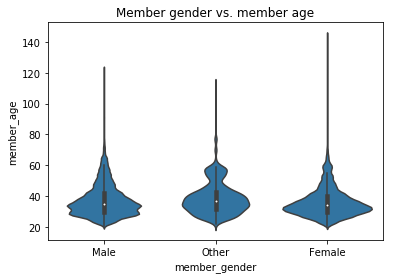

In [19]:
sb.violinplot(data = gobikes, x = 'member_gender', y = 'member_age',color=base_color)
plt.title('Member gender vs. member age')

The violin plot shows that most occurrences of Male and Female are by person between 20 and 39.

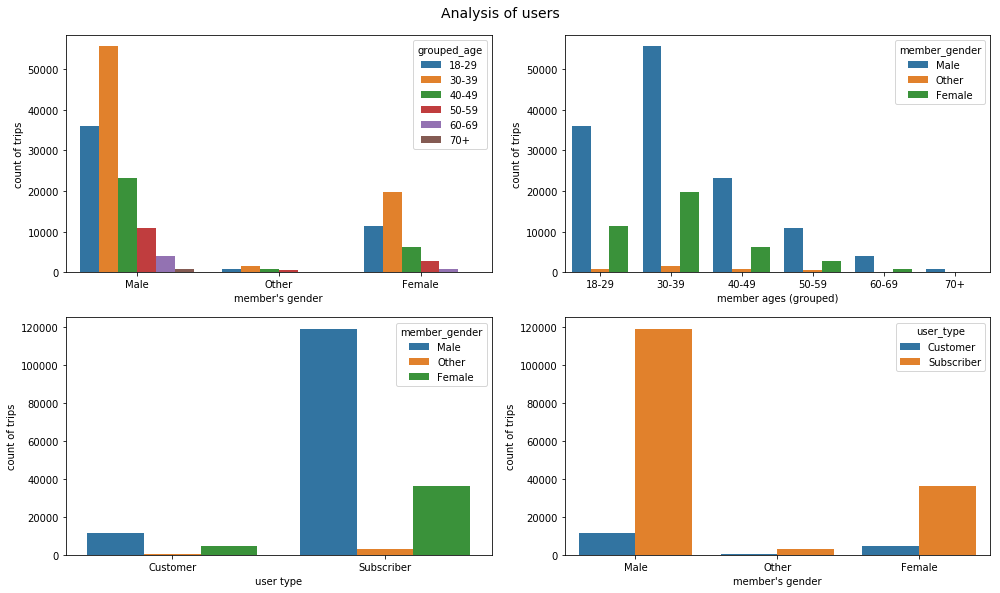

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize = [14,8])
base_color = sb.color_palette()[0]
plt.suptitle('Analysis of users', fontsize=14, y=1.025)

ax1 = plt.subplot(2,2,1)
ax1=sb.countplot(data = gobikes, x = 'member_gender', hue = 'grouped_age') 
ax1= plt.xlabel("member's gender")
ax1= plt.ylabel('count of trips')

ax2 = plt.subplot(2,2,2)
ax2=sb.countplot(data = gobikes, x = 'grouped_age', hue = 'member_gender')
ax2= plt.xlabel("member ages (grouped)")
ax2= plt.ylabel('count of trips')


ax3 = plt.subplot(2,2,3)
ax3=sb.countplot(data = gobikes, x = 'user_type', hue = 'member_gender') 
ax3= plt.xlabel('user type')
ax3= plt.ylabel('count of trips')

ax4 = plt.subplot(2,2,4)
ax4=sb.countplot(data = gobikes, x = 'member_gender' , hue = 'user_type')
ax4= plt.xlabel("member's gender")
ax4= plt.ylabel('count of trips')

plt.tight_layout()

The graph 1 shows that there are more men than other genders.
The graph 2 shows that men are majority in all age groups.
In the graphs 3 and 4, men are mojority of the clients.
The majority of clients are subscriber.

In [21]:
numeric_vars = ['duration_sec','member_age']
categoric_vars = ['user_type', 'member_gender']
quantitative_contiguous = ['duration_sec', 'member_age','bike_id']
quantitative_contiguous = ['start_time', 'end_time']
quantitative_binarious = ['bike_share_for_all_trip']
categoric_ordinal = ['user_type', 'member_gender', 'grouped_age']

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> People between 18 and 39 years old are majority in trips. Men are majority among users compared to other genders. 
The percentage of subscribers are high is both genders. The trip number of subscribers is much higher than customers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There ia a difference in the occurrence of outliers in age as a function of gender. I will love to do a study on this in the future 

## Multivariate Exploration

> I made multivariate exploration focusing on the variables duration_sec, member_age, bike_share_for_all_trip and user_type.

In [22]:
samples_bikes = np.random.choice(gobikes.shape[0], 500, replace = False)
bikes_samp500 = gobikes.loc[samples_bikes,:]

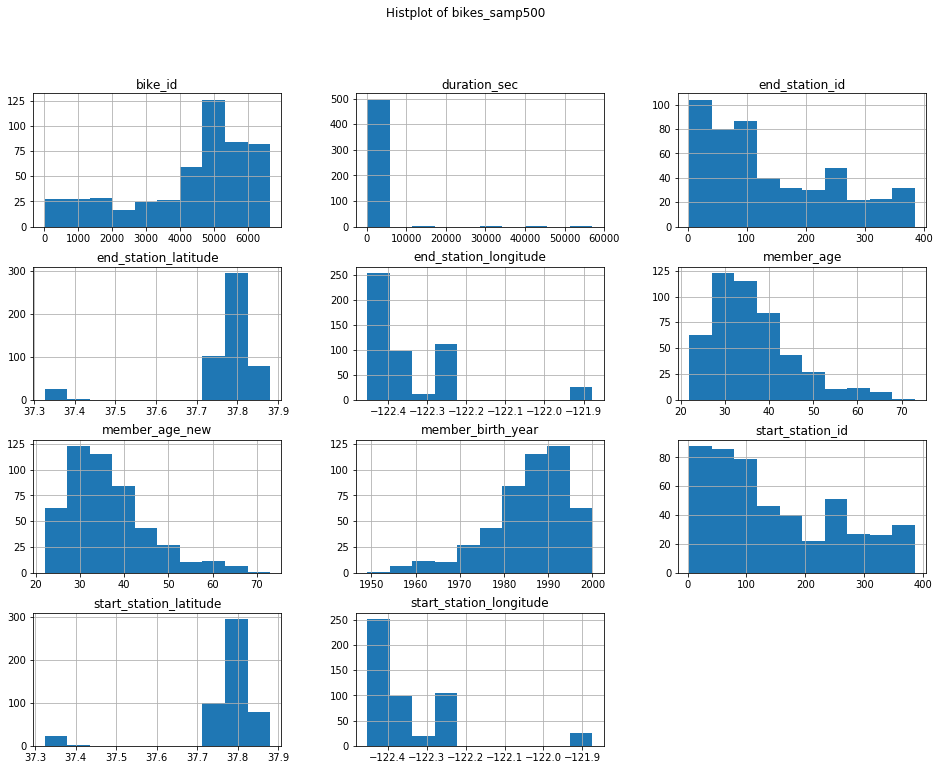

In [23]:
bikes_samp500.hist(figsize=(16,12))
plt.suptitle('Histplot of bikes_samp500')
plt.show()

In [24]:
samples = np.random.choice(gobikes.shape[0], 2000, replace = False)
bikes_samp = gobikes.loc[samples,:]

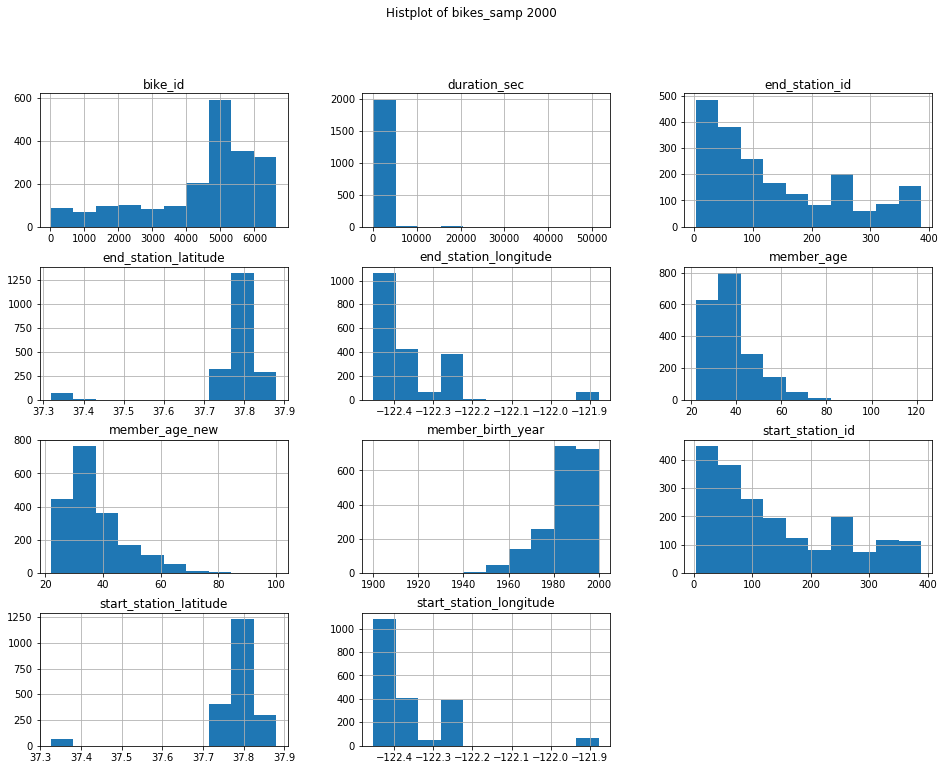

In [25]:
bikes_samp.hist(figsize=(16,12))
plt.suptitle('Histplot of bikes_samp 2000')
plt.show()

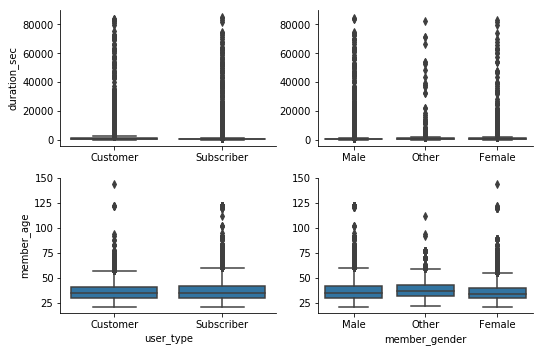

In [26]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = gobikes, y_vars = ['duration_sec', 'member_age'], x_vars = categoric_vars,
             aspect = 1.5)
g.map(boxgrid)
plt.show();

There is no negative relationships between the categorical variables and the numeric variables of interest.

In [27]:
gobikes_small = gobikes.drop(columns=['bike_id'])

#### Creating samples to reduce the time of run.

In [28]:
samples = np.random.choice(gobikes_small.shape[0], 2000, replace = False)
bikes_samp2000 = gobikes_small.loc[samples,:]


In [29]:
gobikes_small.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,grouped_age,member_age_new
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984.0,Male,No,38.0,30-39,38.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,Customer,NaN,NaN,No,NaN,NaN,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972.0,Male,No,50.0,40-49,50.0


In [30]:
samples = np.random.choice(gobikes_small.shape[0], 500, replace = False)
bikes_samp500 = gobikes_small.loc[samples,:]

#### Comparing numerical variables and a categorical one.

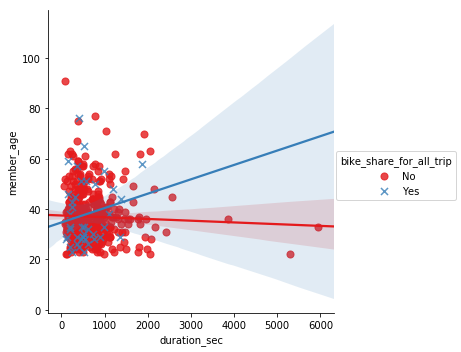

In [31]:
g = sb.lmplot(x="duration_sec", y="member_age", hue="bike_share_for_all_trip", data=bikes_samp500, palette="Set1",  
              markers=["o","x"], scatter_kws={"s": 50},);

The older the member who shares the bike for the entire trip, the longer the trip

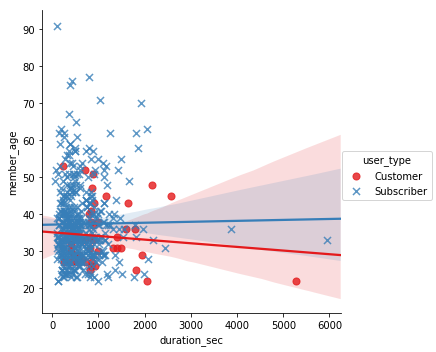

In [32]:
g = sb.lmplot(x="duration_sec", y="member_age", hue="user_type", data=bikes_samp500, palette="Set1",  
              markers=["o","x"], scatter_kws={"s": 50},)

Subscriber urers are a bit older than the customers.

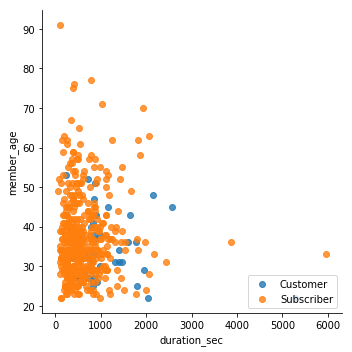

In [33]:
plt.figure(figsize = [6, 6])
#numeric_vars = ['duration_sec_log','member_age']
#categoric_vars = ['weekdays_start', 'user_type', 'member_gender']

# Use the 'hue' argument to provide a factor variable
sb.lmplot( x="duration_sec", y="member_age", data=bikes_samp500, fit_reg=False, hue='user_type', 
          legend=False,x_jitter=.75,)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

The correlation among member age and duration_sec does not present any interesting result. Subscriber urers are a bit older than the customers.

In [34]:
gobikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
member_age                 175147 non-null float64
grouped_age      

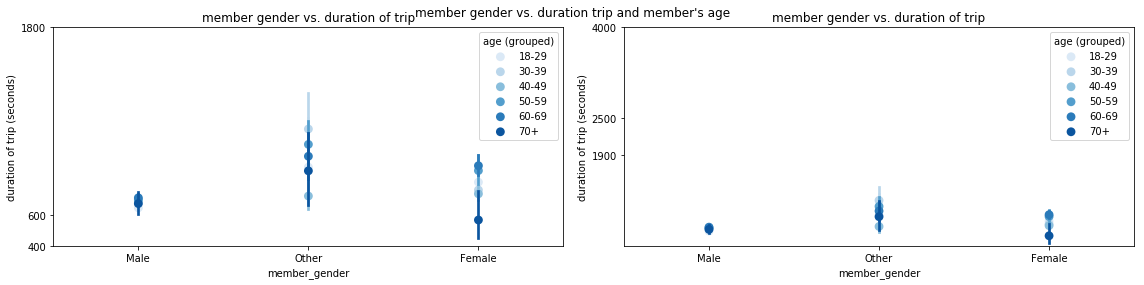

In [35]:
plt.figure(figsize = [16,4])
plt.suptitle("member gender vs. duration trip and member's age")

ax1=plt.subplot(1,2, 1)
ax1=sb.pointplot(data = gobikes, x= 'member_gender', y = 'duration_sec', 
                 hue = 'grouped_age', palette = 'Blues', linestyles = '')
ax1=plt.ylabel('duration of trip (seconds)')
ax1=plt.title('member gender vs. duration of trip')
ax1=plt.yticks([400, 600, 1800]) # 30 minutes
ax1=plt.legend(title='age (grouped)')

ax2=plt.subplot(1, 2, 2)
ax2=sb.pointplot(data = gobikes, x= 'member_gender', y = 'duration_sec', 
                 hue = 'grouped_age', palette = 'Blues', linestyles = '')
ax2=plt.ylabel('duration of trip (seconds)')
ax2=plt.title('member gender vs. duration of trip')
ax2=plt.yticks([1.9e3, 2.5e3, 4e3])
ax2=plt.legend(title='age (grouped)')

plt.tight_layout()

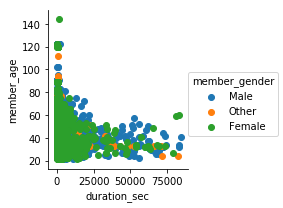

In [36]:
g = sb.FacetGrid(data = gobikes, hue = 'member_gender',)
g.map(plt.scatter, 'duration_sec', 'member_age')
g.add_legend()

This graph highlights the ouliers in member age, mainly for women.

#### Displayed below is a comparism of the number of start-trip stations and final-trip stations.
#### The top 5 stations are highlighted.

In [37]:
start_station_count  = gobikes['start_station_name'].value_counts()
start_station_count = start_station_count[:5,]
start_station_count

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
Name: start_station_name, dtype: int64

In [38]:
end_station_count  = gobikes['end_station_name'].value_counts()
end_station_count = start_station_count[:5,]
end_station_count

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
Name: start_station_name, dtype: int64

The number of trips at the start of the trips is the same that at the end of trips, considering the top five stations. Therefore, it seems that the users use the bike regularly when leaving and returning. It could be interesting to check if they also go to the same route every trip.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I have sorted the variables and droped variables I decided do not use in this work. I compare random samples in function of member_age with bike_share_for_all_trip and duration_sec with member_age (using 500 samples)using lmplot. And analysed the correlation between the numerical variables of member_age and duration_sec using pairplot and using lmplot (with 500 random samples). I Compared a categorical variable with two numericals using facegrid.

### Were there any interesting or surprising interactions between features?

> The older the members who share bikes for the entire trip, the longer the trip. Subscriber users are older than the customers. The correlation between member age and duration_sec does not present any interesting result. The duration of trips by younger people is more stable than the older, these have higher variation. 

In [39]:
gobikes.to_csv('gobikes.csv')